<a href="https://colab.research.google.com/github/Saumya40-codes/Kaggle-titanic-predictions/blob/master/kagggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Aspect1 : Survival on the base of gender***

In [96]:
import csv
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import numpy as np
import random

In [97]:
#importing train.csv data
df_data = DataFrame(pd.read_csv('train.csv',delimiter=','))

In [98]:
#calculating total numbers of passengers in this data
dta = df_data.Survived.value_counts()
total_people = dta[0]+dta[1]
print(total_people)

891


In [99]:
#calculating number of females and males
count = df_data.Sex.value_counts()
female_count = count[1]
male_count = count[0]
print(female_count)
print(male_count)

314
577


In [100]:
total_peoples_saved = df_data.Survived[df_data.Survived == 1].value_counts().max()

#percentage of total people survived
percent_survive = (total_peoples_saved/total_people)*100
print("Percentage of people listed in this data set who got survived:%0.2f"%(percent_survive),'%')

Percentage of people listed in this data set who got survived:38.38 %


In [101]:
male_cols = df_data.Sex[df_data.Sex == 'male']
male_survived = (male_cols[df_data.Survived == 1].value_counts().max())
percent_male_saved = (male_survived/male_count)*100
print("Percentage of male who got saved: %0.2f"%(percent_male_saved),"%")
#i.e from the amount of male who were present only 18.89% of them were got saved

Percentage of male who got saved: 18.89 %


In [102]:
female_cols = df_data.Sex[df_data.Sex == 'female']
female_survived = female_cols[df_data.Survived == 1].value_counts().max()
percent_female_saved = (female_survived/female_count)*100
print("Percentage of female who got saved: %0.2f"%(percent_female_saved),"%")
#i.e from the amount of female who were present 74.20% of them were got saved

Percentage of female who got saved: 74.20 %


Text(0, 0.5, 'Survival number')

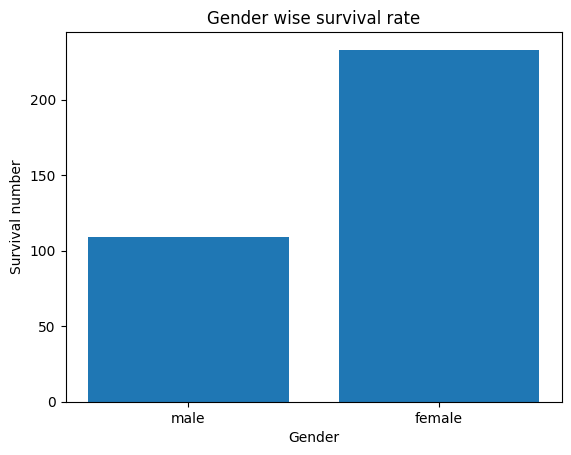

In [103]:
#VISUAL REPRESENTATION
data = [male_survived,female_survived]
x_val = ['male','female']
saved_graph = plt.bar(x_val,data)
plt.title('Gender wise survival rate')
plt.xlabel('Gender')
plt.ylabel('Survival number')

So as it can be seen through above outputs that though not many people were saved but the proportion of female being saved was more than that of a male

# **Predicting test.csv data now using this above set of rules**

In [104]:
df2_data =DataFrame(pd.read_csv('test.csv'))

In [105]:
#calculating total people in the given dataset
dta2 = df2_data.Sex.value_counts()
total_people2 = dta2[0] + dta2[1]
print("Total number of people data:",total_people2)

male_count2 = dta2[0]
female_count2 = dta2[1]


#according to the previous dataset 38.38% of people should survive
people_survived2 = int((total_people2*percent_survive)//100)
print("Number of people which may have survived in this data set:%d"%(people_survived2))

Total number of people data: 418
Number of people which may have survived in this data set:160


In [106]:
#according to 'train.csv' 74.20% of female were saved and 18.89% male were saved"
total_female = df2_data.Sex[df2_data.Sex == 'female'].value_counts()
female_saved2 = int((total_female*percent_female_saved)//100)


#now total man saved = total_saved - female_saved
male_saved2 = people_survived2 - female_saved2


In [107]:
#for female
saved_dataf = [0]*female_count2
rnd = np.random.randint(0,female_saved2)
rnd_list = []
i = 0
while(i<female_saved2):
  rnd = np.random.randint(0,len(saved_dataf))
  if(rnd not in rnd_list):
    rnd_list.append(rnd)
    saved_dataf[rnd] = 1
    i = i+1

In [108]:
#for male
saved_datam = [0]*male_count2
rnd2 = np.random.randint(0,male_saved2)
rnd2_list = []
j = 0
while(j<male_saved2):
  rnd2 = np.random.randint(0,len(saved_datam))
  if(rnd2 not in rnd2_list):
    rnd2_list.append(rnd2)
    saved_datam[rnd2] = 1
    j = j+1

In [109]:
final_list = []*total_people2
f = 0
m  = 0
for i in df2_data.PassengerId.values:
  if i in df2_data.PassengerId.values[df2_data.Sex == 'female']:
    final_list.append(saved_dataf[f])
    f = f+1
  else:
    final_list.append(saved_datam[m])
    m = m+1

In [110]:
#now adding this data into a csv file
new_df = DataFrame(pd.read_csv('gender_based_observation.csv',delimiter=','))
new_df.insert(loc=1,column='survived',value=final_list)
#making a new csv file with reference to this
csv_data = new_df.to_csv('gender_based_prediction.csv') 
print('\nCSV String:\n', csv_data)


CSV String:
 None


Text(0, 0.5, 'Survival number')

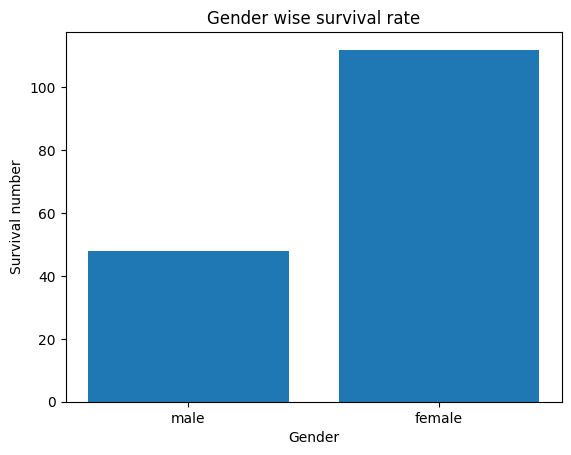

In [111]:
#VISUAL REPRESENTATION
data1 = [male_saved2,female_saved2]
x_val1 = ['male','female']
saved_graph1 = plt.bar(x_val1,data1)
plt.title('Gender wise survival rate')
plt.xlabel('Gender')
plt.ylabel('Survival number')

**CONCLUSION**
Thus by all above observation it can be concluded that more number of female got saved than that of men

**Now, I'll implement the Kth nearest neighbour approach for Amount of fair paid and survived or not approach**

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def make_data(dataframe):
  x = np.reshape(dataframe[dataframe.columns[7]].values, (-1,1))
  y = np.reshape(dataframe[dataframe.columns[-1]].values , (-1,1))


  return x,y


In [113]:
x_train,y_train = make_data(df_data)

In [114]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [115]:
df2_data.columns[-3]

'Fare'

In [116]:
to_pred = np.reshape(df2_data[df_data.columns[-3]].values, (-1,1))

pred = knn_model.predict(to_pred)

In [119]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [122]:
#now adding this data into a csv file
new_df = DataFrame(pd.read_csv('gender_based_obs.csv',delimiter=','))
new_df.insert(loc=1,column='survived',value=pred)


#making a new csv file with reference to this
csv_data = new_df.to_csv('fare_based_prediction.csv') 
print('\nCSV String:\n', csv_data)



CSV String:
 None
